<a href="https://colab.research.google.com/github/A-b-h-i-s-h-e-k-Github-K-u-m-a-r/Deep_Learning_Project/blob/main/2Dimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from skimage import exposure
from math import ceil

In [5]:
def convolution2d(conv_input, conv_kernel, bias=0, strides=(1, 1), padding='same'):
    # This function which takes an input (Tensor) and a kernel (Tensor)
    # and returns the convolution of them
    # Args:
    #   conv_input: a numpy array of size [input_height, input_width, input # of channels].
    #   conv_kernel: a numpy array of size [kernel_height, kernel_width, input # of channels]
    #                represents the kernel of the Convolutional Layer's filter.
    #   bias: a scalar value, represents the bias of the Convolutional Layer's filter.
    #   strides: a tuple of (convolution vertical stride, convolution horizontal stride).
    #   padding: type of the padding scheme: 'same' or 'valid'.
    # Returns:
    #   a numpy array (convolution output).

    assert len(conv_kernel.shape) == 3, "The size of the kernel should be (kernel_height, kernel_width, input # of channels)"
    assert len(conv_input.shape) == 3, "The size of the input should be (input_height, input_width, input # of channels)"
    assert conv_kernel.shape[2] == conv_input.shape[2], "the input and the kernel should have the same depth."

    input_w, input_h = conv_input.shape[1], conv_input.shape[0]      # input_width and input_height
    kernel_w, kernel_h = conv_kernel.shape[1], conv_kernel.shape[0]  # kernel_width and kernel_height

    if padding == 'same':
        output_height = int(ceil(float(input_h) / float(strides[0])))
        output_width = int(ceil(float(input_w) / float(strides[1])))

        # Calculate the number of zeros which are needed to add as padding
        pad_along_height = max((output_height - 1) * strides[0] + kernel_h - input_h, 0)
        pad_along_width = max((output_width - 1) * strides[1] + kernel_w - input_w, 0)
        pad_top = pad_along_height // 2             # amount of zero padding on the top
        pad_bottom = pad_along_height - pad_top     # amount of zero padding on the bottom
        pad_left = pad_along_width // 2             # amount of zero padding on the left
        pad_right = pad_along_width - pad_left      # amount of zero padding on the right

        output = np.zeros((output_height, output_width))  # convolution output

        # Add zero padding to the input image
        image_padded = np.zeros((conv_input.shape[0] + pad_along_height,
                                 conv_input.shape[1] + pad_along_width, conv_input.shape[2]))
        image_padded[pad_top:-pad_bottom, pad_left:-pad_right, :] = conv_input

        for x in range(output_width):  # Loop over every pixel of the output
            for y in range(output_height):
                # element-wise multiplication of the kernel and the image
                output[y, x] = (conv_kernel * image_padded[y * strides[0]:y * strides[0] + kernel_h,
                                x * strides[1]:x * strides[1] + kernel_w, :]).sum() + bias

    elif padding == 'valid':
        output_height = int(ceil(float(input_h - kernel_h + 1) / float(strides[0])))
        output_width = int(ceil(float(input_w - kernel_w + 1) / float(strides[1])))

        output = np.zeros((output_height, output_width))  # convolution output

        for x in range(output_width):  # Loop over every pixel of the output
            for y in range(output_height):
                # element-wise multiplication of the kernel and the image
                output[y, x] = (conv_kernel * conv_input[y * strides[0]:y * strides[0] + kernel_h,
                                x * strides[1]:x * strides[1] + kernel_w, :]).sum() + bias

    return output

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


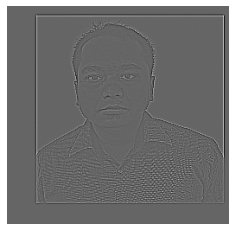

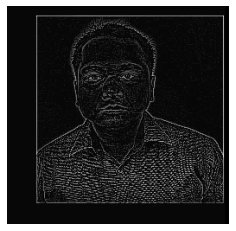

In [23]:
import imageio
img = imageio.imread('drive/My Drive/image.png', pilmode='RGB')

# The edge detection kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])[..., None]
kernel = np.repeat(kernel, 3, axis=2)

# Convolve image and kernel
image_edges= convolution2d(img, kernel)

# Plot the filtered image
plt.imshow(image_edges, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Adjust the contrast of the filtered image by applying Histogram Equalization
image_edges_equalized = exposure.equalize_adapthist(image_edges / np.max(np.abs(image_edges)),
                                                      clip_limit=0.03)
plt.imshow(image_edges_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()